# 14th April Assignment

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=10)

In [9]:
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [10]:
y_predicted = classifier.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,classification_report

In [12]:
print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.79      0.94      0.86        16

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



In [13]:
imp = classifier.feature_importances_

In [14]:
t_imp = sorted(imp,reverse=True)[:5]

In [15]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

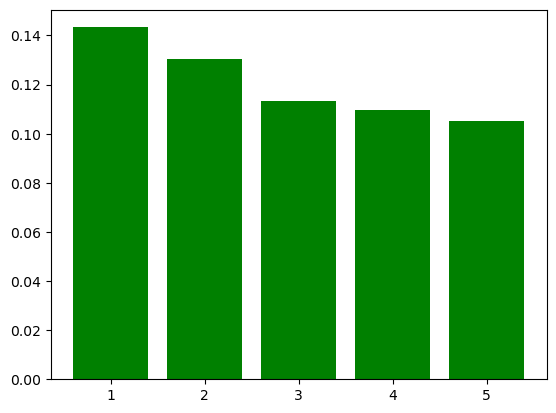

In [16]:
plt.bar(range(1,6),t_imp,color='green')

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params = {
        'n_estimators' : [1,10,100,150],
        'max_depth' : [1,5,10,11,None],
        'min_samples_split': [1,10,20,30],
         'min_samples_leaf' : [1,2,3,4,5]
        }

In [21]:
hyper = GridSearchCV(rfc,param_grid=params,cv=5)

In [22]:
hyper.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 11, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 10, 20, 30],
                         'n_estimators': [1, 10, 100, 150]})

In [23]:
hyper.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 10}

In [24]:
rfc = RandomForestClassifier(max_depth=None,min_samples_leaf=4,min_samples_split=20,n_estimators=10)

In [25]:
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=20,
                       n_estimators=10)

In [26]:
y_predicted = rfc.predict(x_test)

In [27]:
print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

